# Flight Price Prediction with droping null value
---

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

## Importing dataset

1. Since data is in form of excel file we have to use pandas read_excel to load the data
2. After loading it is important to check the complete information of data as it can indication many of the hidden infomation such as null values in a column or a row
3. Check whether any null values are there or not. if it is present then following can be done,
    1. Imputing data using Imputation method in sklearn
    2. Filling NaN values with mean, median and mode using fillna() method
4. Describe data --> which can give statistical analysis

In [2]:
train_data = pd.read_excel(r"flight_fare.xlsx")

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


# Basic Checks

In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [6]:
# To know more about the dataset
train_data.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [7]:
train_data["Duration"].value_counts()

2h 50m     550
1h 30m     386
2h 45m     337
2h 55m     337
2h 35m     329
          ... 
31h 30m      1
30h 25m      1
42h 5m       1
4h 10m       1
47h 40m      1
Name: Duration, Length: 368, dtype: int64

# Checking for total null values in each column

In [8]:
train_data.dropna(inplace = True)

In [9]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [10]:
# Duplicate values
train_data[train_data.duplicated()].head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
683,Jet Airways,1/06/2019,Delhi,Cochin,DEL → NAG → BOM → COK,14:35,04:25 02 Jun,13h 50m,2 stops,No info,13376
1061,Air India,21/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,22:00,19:15 22 May,21h 15m,2 stops,No info,10231
1348,Air India,18/05/2019,Delhi,Cochin,DEL → HYD → BOM → COK,17:15,19:15 19 May,26h,2 stops,No info,12392
1418,Jet Airways,6/06/2019,Delhi,Cochin,DEL → JAI → BOM → COK,05:30,04:25 07 Jun,22h 55m,2 stops,In-flight meal not included,10368
1674,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,18:25,21:20,2h 55m,non-stop,No info,7303


In [11]:
# Here we will be removing those repeated values from the dataset and keeping the in-place attribute to be true so that there will be no changes.
train_data.drop_duplicates(keep='first',inplace=True)

In [12]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [13]:
# Checking the different Airline Routes 
train_data["Route"].unique()

array(['BLR → DEL', 'CCU → IXR → BBI → BLR', 'DEL → LKO → BOM → COK',
       'CCU → NAG → BLR', 'BLR → NAG → DEL', 'CCU → BLR',
       'BLR → BOM → DEL', 'DEL → BOM → COK', 'DEL → BLR → COK',
       'MAA → CCU', 'CCU → BOM → BLR', 'DEL → AMD → BOM → COK',
       'DEL → PNQ → COK', 'DEL → CCU → BOM → COK', 'BLR → COK → DEL',
       'DEL → IDR → BOM → COK', 'DEL → LKO → COK',
       'CCU → GAU → DEL → BLR', 'DEL → NAG → BOM → COK',
       'CCU → MAA → BLR', 'DEL → HYD → COK', 'CCU → HYD → BLR',
       'DEL → COK', 'CCU → DEL → BLR', 'BLR → BOM → AMD → DEL',
       'BOM → DEL → HYD', 'DEL → MAA → COK', 'BOM → HYD',
       'DEL → BHO → BOM → COK', 'DEL → JAI → BOM → COK',
       'DEL → ATQ → BOM → COK', 'DEL → JDH → BOM → COK',
       'CCU → BBI → BOM → BLR', 'BLR → MAA → DEL',
       'DEL → GOI → BOM → COK', 'DEL → BDQ → BOM → COK',
       'CCU → JAI → BOM → BLR', 'CCU → BBI → BLR', 'BLR → HYD → DEL',
       'DEL → TRV → COK', 'CCU → IXR → DEL → BLR',
       'DEL → IXU → BOM → COK', 'CCU 

<AxesSubplot:xlabel='count', ylabel='Airline'>

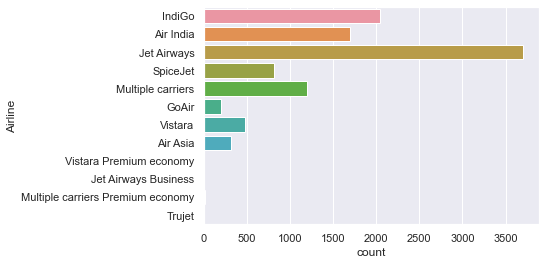

In [14]:
# Bar Chart for Flight Categories
sns.countplot(y=train_data["Airline"])

<AxesSubplot:xlabel='Source', ylabel='count'>

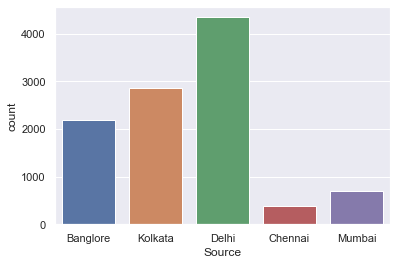

In [15]:
#Bar Chart for Source 
sns.countplot(x=train_data["Source"])

<AxesSubplot:xlabel='Destination', ylabel='count'>

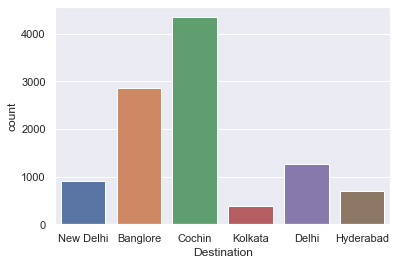

In [16]:
#Bar Chart for Destination
sns.countplot(x=train_data["Destination"])

<AxesSubplot:xlabel='count', ylabel='Source'>

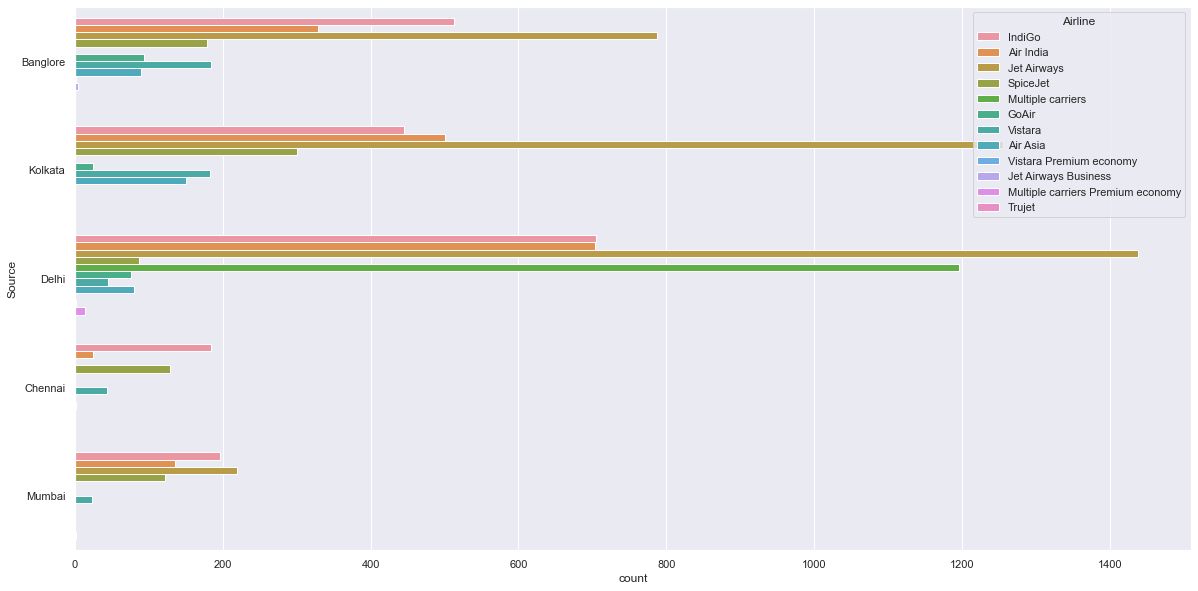

In [17]:
#Source wise Flight Categories 
fig, ax = plt.subplots(figsize=(20,10))
sns.countplot(y=train_data["Source"],hue=train_data["Airline"],ax=ax)

<AxesSubplot:xlabel='count', ylabel='Destination'>

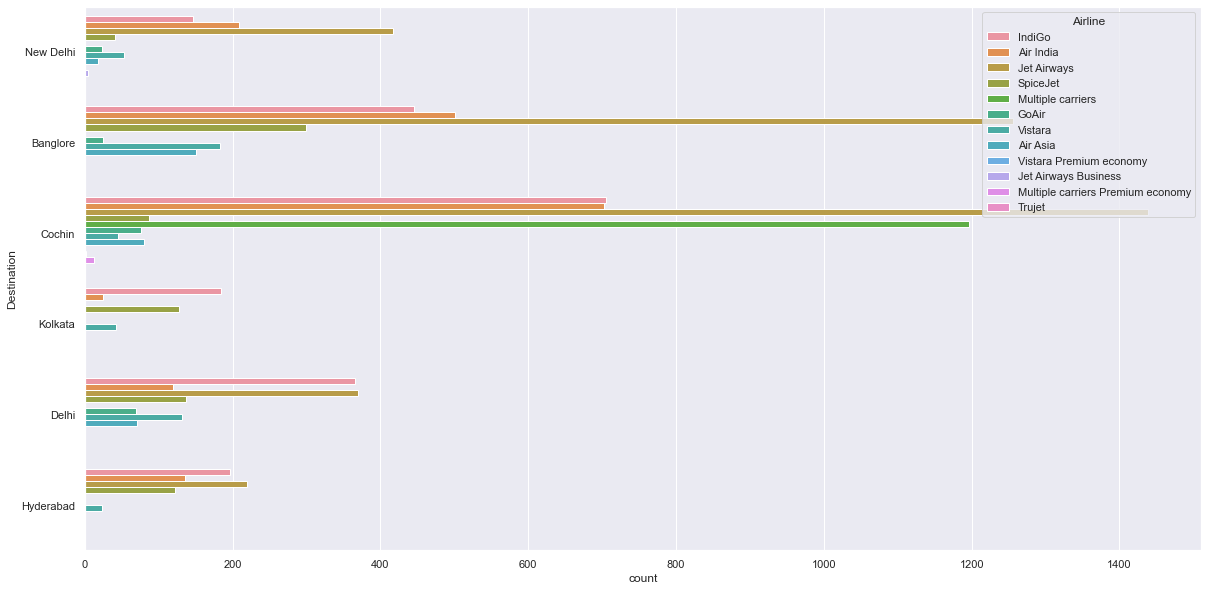

In [18]:
#Destination wise Flight Categories 
fig, ax = plt.subplots(figsize=(20,10))
sns.countplot(y=train_data["Destination"],hue=train_data["Airline"],ax=ax)

In [19]:
data_cat=train_data[['Airline','Source', 'Destination','Total_Stops','Additional_Info']]

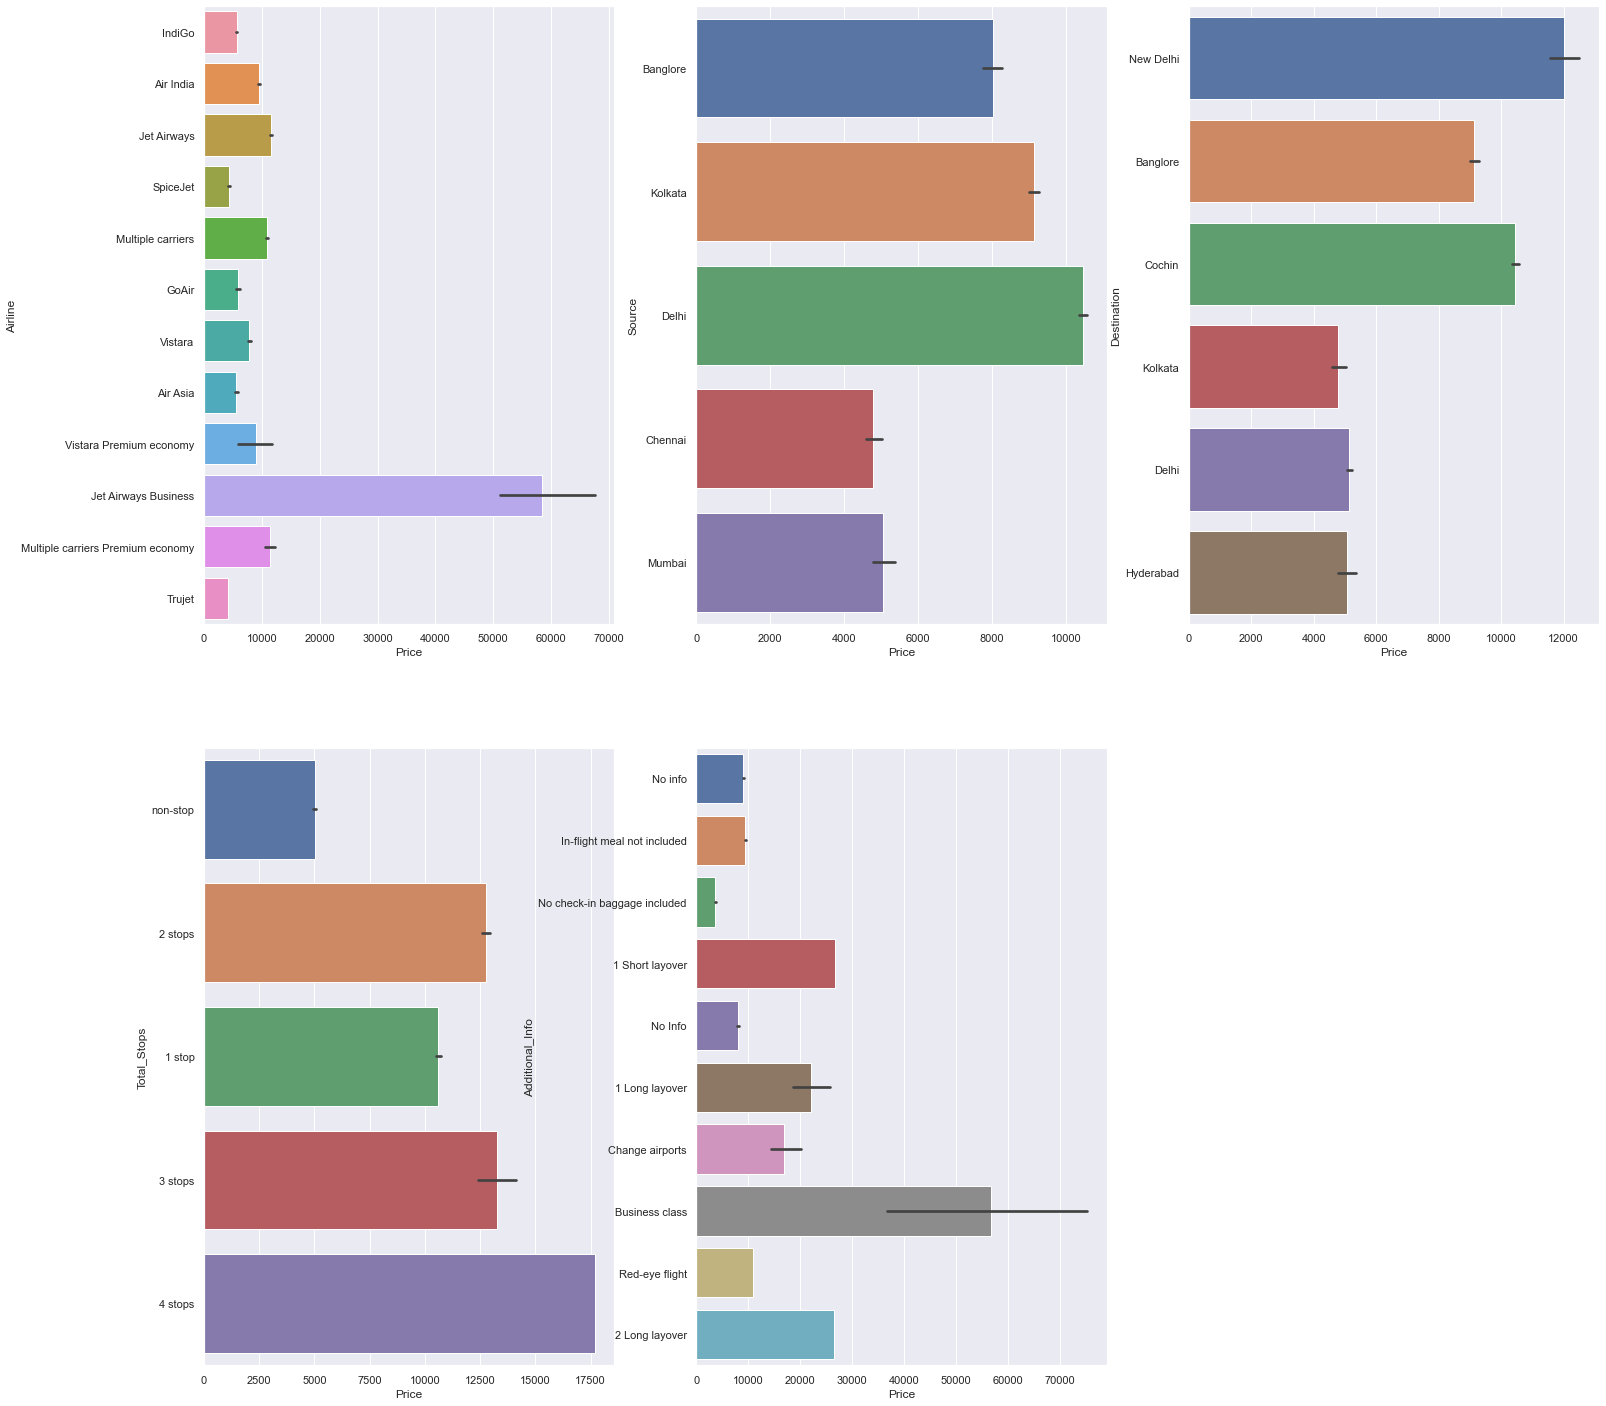

In [20]:
plt.figure(figsize=(25,25),facecolor='white')
plotnum=1
for c in data_cat:
    if(plotnum<=7):
        ax=plt.subplot(2,3,plotnum)
        sns.barplot(y=train_data[c],x=train_data['Price'])
    plotnum+=1

Summary

Jet airways business has the highest average price of flights while trujet and spicejet has the lowest.

Highest price is from delhi and to delhi, lowest is from chennai and to kolkata.

Nonstop flight has the lowest price and 4 stop flight has the highest.

business class has the highest price and no check in baggage has the lowest.

# Feature Engineering
#### Looking at the dataset, there are 4 columns with date-time variables and we need to apply featrure engineering to those columns

In [22]:
#First we consider Duration column
train_data["Duration"].value_counts()

2h 50m     544
1h 30m     386
2h 45m     335
2h 55m     332
2h 35m     329
          ... 
30h 25m      1
30h 15m      1
42h 5m       1
28h 55m      1
47h 40m      1
Name: Duration, Length: 368, dtype: int64

In [23]:
# Converting 'Duration' column into a list
duration_train_data = list(train_data["Duration"])
duration_train_data

['2h 50m',
 '7h 25m',
 '19h',
 '5h 25m',
 '4h 45m',
 '2h 25m',
 '15h 30m',
 '21h 5m',
 '25h 30m',
 '7h 50m',
 '13h 15m',
 '2h 35m',
 '2h 15m',
 '12h 10m',
 '2h 35m',
 '26h 35m',
 '4h 30m',
 '22h 35m',
 '23h',
 '20h 35m',
 '5h 10m',
 '15h 20m',
 '2h 50m',
 '2h 55m',
 '13h 20m',
 '15h 10m',
 '5h 45m',
 '5h 55m',
 '2h 50m',
 '2h 15m',
 '2h 15m',
 '13h 25m',
 '2h 50m',
 '22h',
 '5h 30m',
 '10h 25m',
 '5h 15m',
 '2h 30m',
 '6h 15m',
 '11h 55m',
 '11h 5m',
 '8h 30m',
 '22h 5m',
 '2h 45m',
 '12h',
 '2h 50m',
 '2h 50m',
 '2h 15m',
 '16h 5m',
 '19h 55m',
 '3h 15m',
 '25h 20m',
 '2h 50m',
 '3h',
 '2h 50m',
 '16h 15m',
 '15h 5m',
 '2h 15m',
 '6h 30m',
 '25h 5m',
 '12h 25m',
 '27h 20m',
 '10h 15m',
 '10h 30m',
 '2h 15m',
 '10h 25m',
 '2h 50m',
 '1h 30m',
 '13h 20m',
 '2h 15m',
 '1h 25m',
 '26h 30m',
 '7h 20m',
 '13h 30m',
 '5h',
 '2h 45m',
 '2h 50m',
 '1h 30m',
 '19h 5m',
 '2h 15m',
 '14h 50m',
 '2h 40m',
 '22h 10m',
 '9h 35m',
 '10h',
 '21h 20m',
 '5h 25m',
 '18h 45m',
 '12h 20m',
 '18h',
 '9h 15

In [24]:
#apply loop to separate hours from minutes
#.split() method splits a string into a list
#also, hour is represented by 'h' and minute by'm'
#.strip() method returns a copy of the string by removing both the leading and the trailing characters

for i in range(len(duration_train_data)):
    if len(duration_train_data[i].split()) != 2:   
        if "h" in duration_train_data[i]:
            duration_train_data[i] = duration_train_data[i].strip() + ' 0m'  # add 0 minute 
        else:
            duration_train_data[i] = '0h '+ duration_train_data[i]           # add 0 hour
            duration_hours = []
            duration_mins = []
for i in range(len(duration_train_data)):
    duration_hours.append(int(duration_train_data[i].split(sep = "h")[0]))
    duration_mins.append(int(duration_train_data[i].split(sep = "m")[0].split()[-1]))

In [25]:
duration_train_data

['2h 50m',
 '7h 25m',
 '19h 0m',
 '5h 25m',
 '4h 45m',
 '2h 25m',
 '15h 30m',
 '21h 5m',
 '25h 30m',
 '7h 50m',
 '13h 15m',
 '2h 35m',
 '2h 15m',
 '12h 10m',
 '2h 35m',
 '26h 35m',
 '4h 30m',
 '22h 35m',
 '23h 0m',
 '20h 35m',
 '5h 10m',
 '15h 20m',
 '2h 50m',
 '2h 55m',
 '13h 20m',
 '15h 10m',
 '5h 45m',
 '5h 55m',
 '2h 50m',
 '2h 15m',
 '2h 15m',
 '13h 25m',
 '2h 50m',
 '22h 0m',
 '5h 30m',
 '10h 25m',
 '5h 15m',
 '2h 30m',
 '6h 15m',
 '11h 55m',
 '11h 5m',
 '8h 30m',
 '22h 5m',
 '2h 45m',
 '12h 0m',
 '2h 50m',
 '2h 50m',
 '2h 15m',
 '16h 5m',
 '19h 55m',
 '3h 15m',
 '25h 20m',
 '2h 50m',
 '3h 0m',
 '2h 50m',
 '16h 15m',
 '15h 5m',
 '2h 15m',
 '6h 30m',
 '25h 5m',
 '12h 25m',
 '27h 20m',
 '10h 15m',
 '10h 30m',
 '2h 15m',
 '10h 25m',
 '2h 50m',
 '1h 30m',
 '13h 20m',
 '2h 15m',
 '1h 25m',
 '26h 30m',
 '7h 20m',
 '13h 30m',
 '5h 0m',
 '2h 45m',
 '2h 50m',
 '1h 30m',
 '19h 5m',
 '2h 15m',
 '14h 50m',
 '2h 40m',
 '22h 10m',
 '9h 35m',
 '10h 0m',
 '21h 20m',
 '5h 25m',
 '18h 45m',
 '12h 

In [26]:
train_data['Duration_hrs'] = duration_hours
train_data['Duration_hrs']

0         2
1         7
2        19
3         5
4         4
         ..
10678     2
10679     2
10680     3
10681     2
10682     8
Name: Duration_hrs, Length: 10462, dtype: int64

In [27]:
train_data['Duration_mins'] = duration_mins
train_data['Duration_mins']

0        50
1        25
2         0
3        25
4        45
         ..
10678    30
10679    35
10680     0
10681    40
10682    20
Name: Duration_mins, Length: 10462, dtype: int64

In [28]:
train_data.drop('Duration', axis=1, inplace=True)

## EDA

From description we can see that Date_of_Journey is a object data type,\
Therefore, we have to convert this datatype into timestamp so as to use this column properly for prediction

For this we require pandas **to_datetime** to convert object data type to datetime dtype.

<span style="color: red;">**.dt.day method will extract only day of that date**</span>\
<span style="color: red;">**.dt.month method will extract only month of that date**</span>

In [29]:
train_data["Journey_day"] = pd.to_datetime(train_data.Date_of_Journey, format="%d/%m/%Y").dt.day

In [30]:
train_data["Journey_month"] = pd.to_datetime(train_data["Date_of_Journey"], format = "%d/%m/%Y").dt.month

In [31]:
train_data.drop(['Date_of_Journey'],axis=1,inplace=True)

In [32]:
train_data.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Total_Stops,Additional_Info,Price,Duration_hrs,Duration_mins,Journey_day,Journey_month
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,non-stop,No info,3897,2,50,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,2 stops,No info,7662,7,25,1,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,2 stops,No info,13882,19,0,9,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,1 stop,No info,6218,5,25,12,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,1 stop,No info,13302,4,45,1,3


In [33]:
# Now, we need to take care of Dep_Time
train_data['Dep_hr'] = pd.to_datetime(train_data['Dep_Time']).dt.hour
train_data['Dep_min'] = pd.to_datetime(train_data['Dep_Time']).dt.minute
train_data.drop('Dep_Time', axis = 1, inplace = True)

In [34]:
#Now, we take care of Arrival_Time
train_data['Arrival_hr'] = pd.to_datetime(train_data['Arrival_Time']).dt.hour
train_data['Arrival_min'] = pd.to_datetime(train_data['Arrival_Time']).dt.minute

In [35]:
print('Train dataset shape:', train_data.shape)

Train dataset shape: (10462, 16)


In [36]:



train_data.head()

,Airline,Source,Destination,Route,Arrival_Time,Total_Stops,Additional_Info,Price,Duration_hrs,Duration_mins,Journey_day,Journey_month,Dep_hr,Dep_min,Arrival_hr,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,non-stop,No info,3897,2,50,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,2 stops,No info,7662,7,25,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,2 stops,No info,13882,19,0,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,1 stop,No info,6218,5,25,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,1 stop,No info,13302,4,45,1,3,16,50,21,35


In [37]:
# Arrival time is when the plane pulls up to the gate.
# Similar to Date_of_Journey we can extract values from Arrival_Time

# Extracting Hours
train_data["Arrival_hour"] = pd.to_datetime(train_data.Arrival_Time).dt.hour

# Extracting Minutes
train_data["Arrival_min"] = pd.to_datetime(train_data.Arrival_Time).dt.minute

# Now we can drop Arrival_Time as it is of no use
train_data.drop(["Arrival_Time"], axis = 1, inplace = True)

In [38]:

train_data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Duration_hrs,Duration_mins,Journey_day,Journey_month,Dep_hr,Dep_min,Arrival_hr,Arrival_min,Arrival_hour
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,2,50,24,3,22,20,1,10,1
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,7,25,1,5,5,50,13,15,13
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,19,0,9,6,9,25,4,25,4
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,5,25,12,5,18,5,23,30,23
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,4,45,1,3,16,50,21,35,21


In [39]:
train_data.drop(["Arrival_hour"], axis = 1, inplace = True)


In [40]:
train_data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Duration_hrs,Duration_mins,Journey_day,Journey_month,Dep_hr,Dep_min,Arrival_hr,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,2,50,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,7,25,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,19,0,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,5,25,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,4,45,1,3,16,50,21,35


<AxesSubplot:>

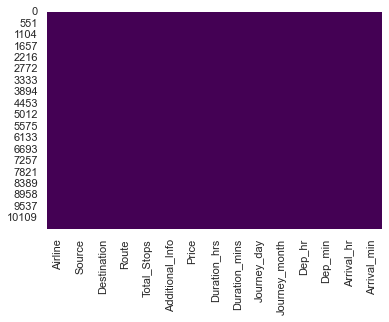

In [41]:
sns.heatmap(train_data.isnull(),cbar=False,cmap='viridis')

In [42]:
#Creating Dummy variables for Destination Column and concatinating the inital dataframe with the destination dummy variables

destination_dummies=pd.get_dummies(train_data["Destination"],prefix='Destination',drop_first=True)

In [43]:
# Adding duration_hours and duration_mins list to train_data dataframe
train_data["Duration_hours"] = duration_hours
train_data["Duration_mins"] = duration_mins

In [44]:
#Dropping Duration Column
train_data.drop(["Duration_hrs"],axis=1,inplace=True)

In [45]:
train_data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Duration_mins,Journey_day,Journey_month,Dep_hr,Dep_min,Arrival_hr,Arrival_min,Duration_hours
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,50,24,3,22,20,1,10,2
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,25,1,5,5,50,13,15,7
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,0,9,6,9,25,4,25,19
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,25,12,5,18,5,23,30,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,45,1,3,16,50,21,35,4


---

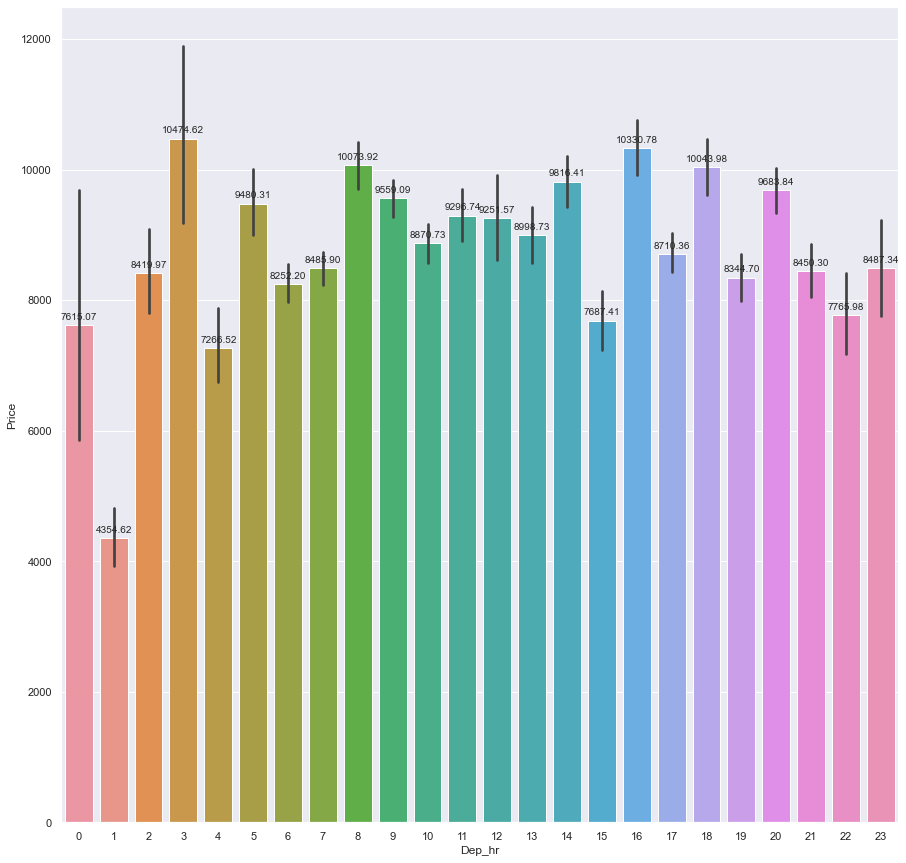

In [46]:
plt.figure(figsize=(15,15),facecolor='white')
plots=sns.barplot(x='Dep_hr',y='Price',data=train_data)
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                  size=10, xytext=(0, 8),
                   textcoords='offset points')

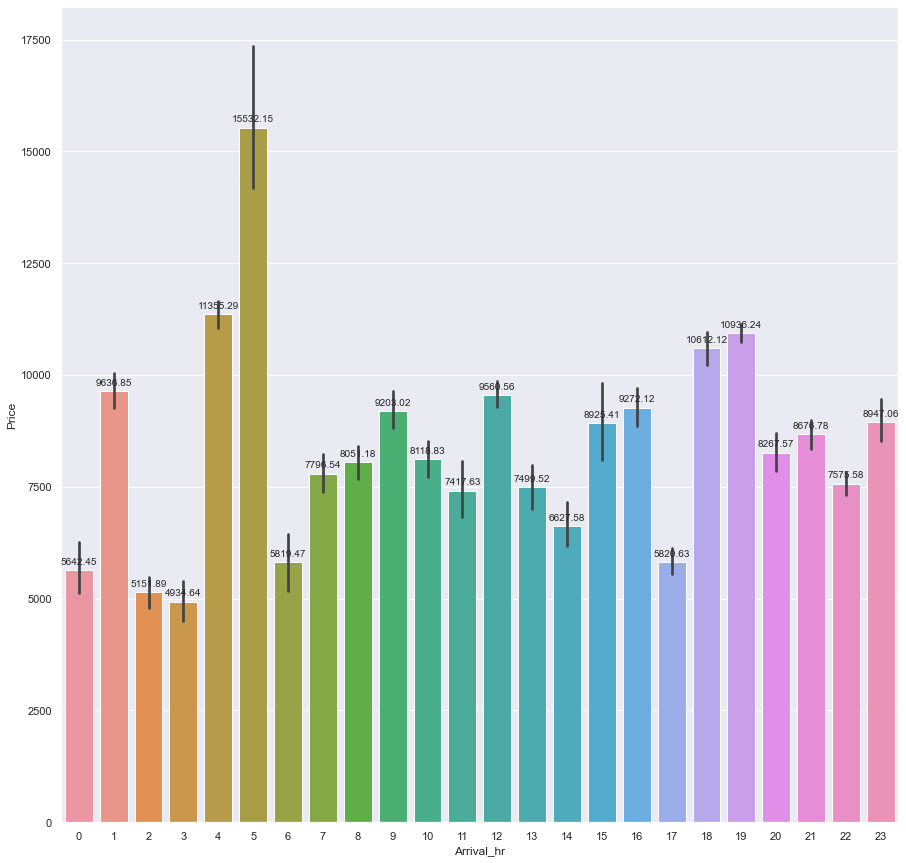

In [47]:
plt.figure(figsize=(15,15),facecolor='white')
plots=sns.barplot(x='Arrival_hr',y='Price',data=train_data)
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 8),
                   textcoords='offset points')

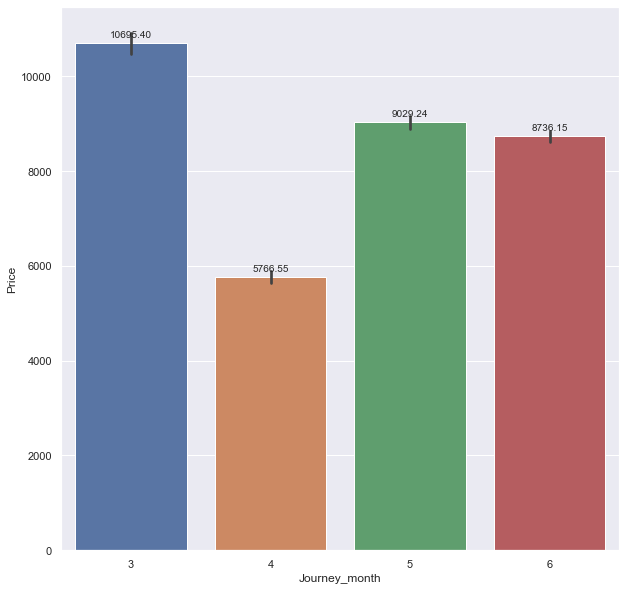

In [49]:
plt.figure(figsize=(10,10),facecolor='white')
plots=sns.barplot(x='Journey_month',y='Price',data=train_data)
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                  size=10, xytext=(0, 8),
                   textcoords='offset points')

## Data Preprocessing / Handling Categorical Data

One can find many ways to handle categorical data. Some of them categorical data are,
1. <span style="color: blue;">**Nominal data**</span> --> data are not in any order --> <span style="color: green;">**OneHotEncoder**</span> is used in this case
2. <span style="color: blue;">**Ordinal data**</span> --> data are in order --> <span style="color: green;">**LabelEncoder**</span> is used in this case

In [50]:
train_data["Airline"].value_counts()

Jet Airways                          3700
IndiGo                               2043
Air India                            1694
Multiple carriers                    1196
SpiceJet                              815
Vistara                               478
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [51]:
train_data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Duration_mins,Journey_day,Journey_month,Dep_hr,Dep_min,Arrival_hr,Arrival_min,Duration_hours
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,50,24,3,22,20,1,10,2
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,25,1,5,5,50,13,15,7
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,0,9,6,9,25,4,25,19
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,25,12,5,18,5,23,30,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,45,1,3,16,50,21,35,4


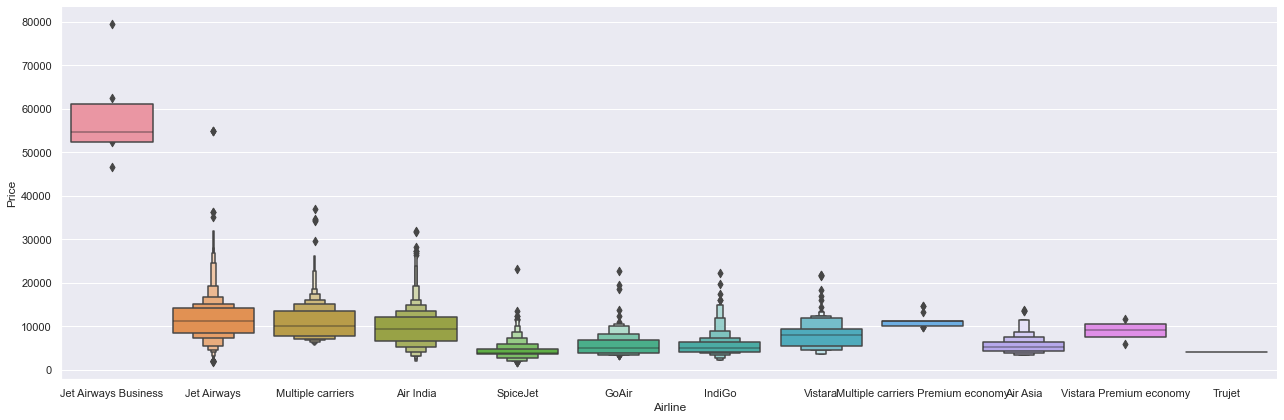

In [52]:
# From graph we can see that Jet Airways Business have the highest Price.
# Apart from the first Airline almost all are having similar median

# Airline vs Price
sns.catplot(y = "Price", x = "Airline", data = train_data.sort_values("Price", ascending = False), kind="boxen", height = 6, aspect = 3)
plt.show()

In [53]:
train_data["Source"].value_counts()

Delhi       4345
Kolkata     2860
Banglore    2179
Mumbai       697
Chennai      381
Name: Source, dtype: int64

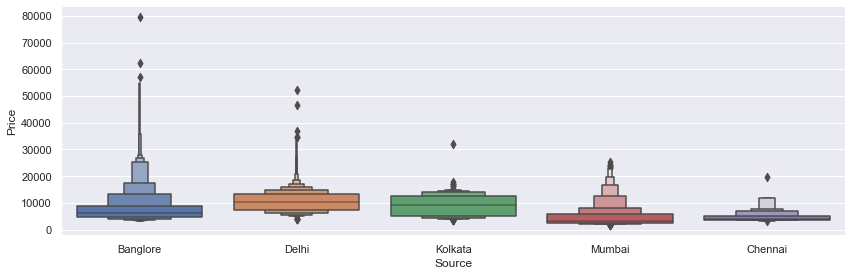

In [54]:
# Source vs Price

sns.catplot(y = "Price", x = "Source", data = train_data.sort_values("Price", ascending = False), kind="boxen", height = 4, aspect = 3)
plt.show()

In [55]:
train_data["Destination"].value_counts()

Cochin       4345
Banglore     2860
Delhi        1265
New Delhi     914
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [56]:
train_data["Route"]

0                    BLR → DEL
1        CCU → IXR → BBI → BLR
2        DEL → LKO → BOM → COK
3              CCU → NAG → BLR
4              BLR → NAG → DEL
                 ...          
10678                CCU → BLR
10679                CCU → BLR
10680                BLR → DEL
10681                BLR → DEL
10682    DEL → GOI → BOM → COK
Name: Route, Length: 10462, dtype: object

In [57]:
#Value Count of Additional_Info Column
train_data["Additional_Info"].value_counts()

No info                         8182
In-flight meal not included     1926
No check-in baggage included     318
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: Additional_Info, dtype: int64

### As we can see that 8182/10683 = 78.11% data has no information,hence we can drop this Additional_Info Column

In [58]:
# Additional_Info contains almost 80% no_info
# Route and Total_Stops are related to each other

train_data.drop(["Route", "Additional_Info"], axis = 1, inplace = True)

In [59]:
train_data["Total_Stops"].value_counts()

1 stop      5625
non-stop    3475
2 stops     1318
3 stops       43
4 stops        1
Name: Total_Stops, dtype: int64

In [60]:
# As this is case of Ordinal Categorical type we perform LabelEncoder
# Here Values are assigned with corresponding keys

train_data.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

In [61]:
train_data.head()

,Airline,Source,Destination,Total_Stops,Price,Duration_mins,Journey_day,Journey_month,Dep_hr,Dep_min,Arrival_hr,Arrival_min,Duration_hours
0,IndiGo,Banglore,New Delhi,0,3897,50,24,3,22,20,1,10,2
1,Air India,Kolkata,Banglore,2,7662,25,1,5,5,50,13,15,7
2,Jet Airways,Delhi,Cochin,2,13882,0,9,6,9,25,4,25,19
3,IndiGo,Kolkata,Banglore,1,6218,25,12,5,18,5,23,30,5
4,IndiGo,Banglore,New Delhi,1,13302,45,1,3,16,50,21,35,4


In [62]:
#Creating Dummy variables for Destination Column and concatinating the inital dataframe with the destination dummy variables

destination_dummies=pd.get_dummies(train_data["Destination"],prefix='Destination',drop_first=True)
train_data=pd.concat([train_data,destination_dummies],axis=1).drop('Destination',axis=1)

In [63]:
train_data.head()

,Airline,Source,Total_Stops,Price,Duration_mins,Journey_day,Journey_month,Dep_hr,Dep_min,Arrival_hr,Arrival_min,Duration_hours,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,IndiGo,Banglore,0,3897,50,24,3,22,20,1,10,2,0,0,0,0,1
1,Air India,Kolkata,2,7662,25,1,5,5,50,13,15,7,0,0,0,0,0
2,Jet Airways,Delhi,2,13882,0,9,6,9,25,4,25,19,1,0,0,0,0
3,IndiGo,Kolkata,1,6218,25,12,5,18,5,23,30,5,0,0,0,0,0
4,IndiGo,Banglore,1,13302,45,1,3,16,50,21,35,4,0,0,0,0,1


In [64]:
#Concatinating the inital dataframe with the source dummy variables
source_dummies=pd.get_dummies(train_data["Source"],prefix='Source',drop_first=True)
train_data=pd.concat([train_data,source_dummies],axis=1).drop('Source',axis=1)

In [65]:
#Concatinating the inital dataframe with the airline dummy variables
airline_dummies=pd.get_dummies(train_data["Airline"],prefix='Airline',drop_first=True)
train_data=pd.concat([train_data,airline_dummies],axis=1).drop('Airline',axis=1)

In [66]:
train_data.head()

,Total_Stops,Price,Duration_mins,Journey_day,Journey_month,Dep_hr,Dep_min,Arrival_hr,Arrival_min,Duration_hours,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,3897,50,24,3,22,20,1,10,2,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,2,7662,25,1,5,5,50,13,15,7,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0
2,2,13882,0,9,6,9,25,4,25,19,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
3,1,6218,25,12,5,18,5,23,30,5,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
4,1,13302,45,1,3,16,50,21,35,4,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [67]:
#All the columns are of the integer type
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10462 entries, 0 to 10682
Data columns (total 30 columns):
 #   Column                                     Non-Null Count  Dtype
---  ------                                     --------------  -----
 0   Total_Stops                                10462 non-null  int64
 1   Price                                      10462 non-null  int64
 2   Duration_mins                              10462 non-null  int64
 3   Journey_day                                10462 non-null  int64
 4   Journey_month                              10462 non-null  int64
 5   Dep_hr                                     10462 non-null  int64
 6   Dep_min                                    10462 non-null  int64
 7   Arrival_hr                                 10462 non-null  int64
 8   Arrival_min                                10462 non-null  int64
 9   Duration_hours                             10462 non-null  int64
 10  Destination_Cochin                         104

In [68]:
#Converting the object type Total_Stops column to integer type Total_Stops Column
train_data['Total_Stops']=train_data['Total_Stops'].astype(int)

In [69]:
train_data.head()

,Total_Stops,Price,Duration_mins,Journey_day,Journey_month,Dep_hr,Dep_min,Arrival_hr,Arrival_min,Duration_hours,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,3897,50,24,3,22,20,1,10,2,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,2,7662,25,1,5,5,50,13,15,7,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0
2,2,13882,0,9,6,9,25,4,25,19,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
3,1,6218,25,12,5,18,5,23,30,5,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
4,1,13302,45,1,3,16,50,21,35,4,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [70]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10462 entries, 0 to 10682
Data columns (total 30 columns):
 #   Column                                     Non-Null Count  Dtype
---  ------                                     --------------  -----
 0   Total_Stops                                10462 non-null  int32
 1   Price                                      10462 non-null  int64
 2   Duration_mins                              10462 non-null  int64
 3   Journey_day                                10462 non-null  int64
 4   Journey_month                              10462 non-null  int64
 5   Dep_hr                                     10462 non-null  int64
 6   Dep_min                                    10462 non-null  int64
 7   Arrival_hr                                 10462 non-null  int64
 8   Arrival_min                                10462 non-null  int64
 9   Duration_hours                             10462 non-null  int64
 10  Destination_Cochin                         104

In [71]:
train_data.shape

(10462, 30)

<AxesSubplot:>

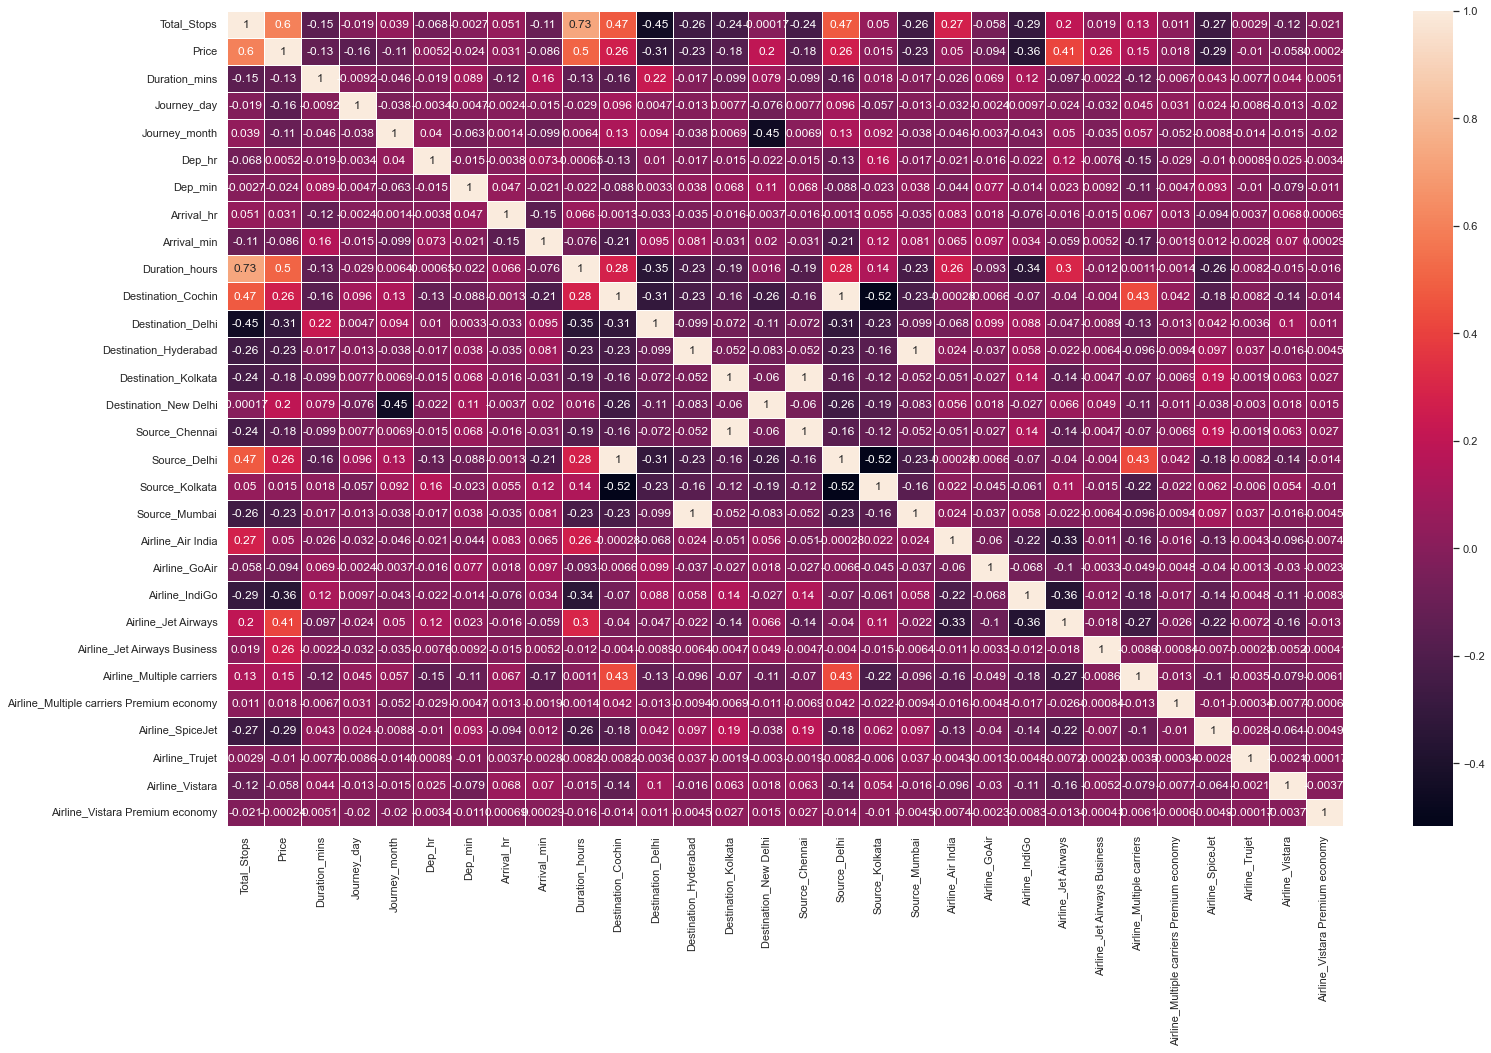

In [72]:
#Correlation Matrix in the form of heatmap
fig,ax = plt.subplots(figsize=(25,15))
corr=train_data.corr()
sns.heatmap(corr,ax=ax,annot=True,linewidth=.5)

In [73]:
#List of 30 columns available
train_data.columns

Index(['Total_Stops', 'Price', 'Duration_mins', 'Journey_day', 'Journey_month',
       'Dep_hr', 'Dep_min', 'Arrival_hr', 'Arrival_min', 'Duration_hours',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi', 'Source_Chennai',
       'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai', 'Airline_Air India',
       'Airline_GoAir', 'Airline_IndiGo', 'Airline_Jet Airways',
       'Airline_Jet Airways Business', 'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy'],
      dtype='object')

In [74]:
#Rearranging the features as per Independent and Dependent Features
train_data=train_data[['Total_Stops', 'Price', 'Duration_mins', 'Journey_day', 'Journey_month',
       'Dep_hr', 'Dep_min', 'Arrival_hr', 'Arrival_min', 'Duration_hours',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi', 'Source_Chennai',
       'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai', 'Airline_Air India',
       'Airline_GoAir', 'Airline_IndiGo', 'Airline_Jet Airways',
       'Airline_Jet Airways Business', 'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy']]

In [75]:
train_data.head()

,Total_Stops,Price,Duration_mins,Journey_day,Journey_month,Dep_hr,Dep_min,Arrival_hr,Arrival_min,Duration_hours,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,3897,50,24,3,22,20,1,10,2,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,2,7662,25,1,5,5,50,13,15,7,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0
2,2,13882,0,9,6,9,25,4,25,19,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
3,1,6218,25,12,5,18,5,23,30,5,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
4,1,13302,45,1,3,16,50,21,35,4,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [76]:
X= train_data.drop(['Price'],axis=1)
Y=train_data['Price']

In [77]:
from sklearn.model_selection  import train_test_split
X_train,X_test,Y_train,Y_test= train_test_split(X,Y,test_size=0.3,random_state=100)

# Model Building
## R2 is a statistic that will give some information about the goodness of fit of a model. In regression, 
### the R2 coefficient of determination is a statistical measure of how well the regression predictions approximate the real data points.
#### An R2 of 1 indicates that the regression predictions perfectly fit the data.


### Random Forest

In [78]:
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor()
reg_rf.fit(X_train, Y_train)

RandomForestRegressor()

In [79]:
reg_rf.score(X_train, Y_train)

0.9570454694778235

In [80]:
reg_rf.score(X_test, Y_test)

0.7893537913346071

In [81]:
y_pred = reg_rf.predict(X_test)
y_train_pred=reg_rf.predict(X_train)

In [82]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
r2score=r2_score(Y_test,y_pred)
r2score

0.7893537913346071

In [83]:
r2score=r2_score(Y_train,y_train_pred)
r2score

0.9570454694778235

In [84]:

import math
print(mean_squared_error(Y_test,y_pred))
print(math.sqrt(mean_squared_error(Y_test,y_pred))) 
print(mean_absolute_error(Y_test,y_pred))

4551843.670983323
2133.5050201448607
1230.0552135246794


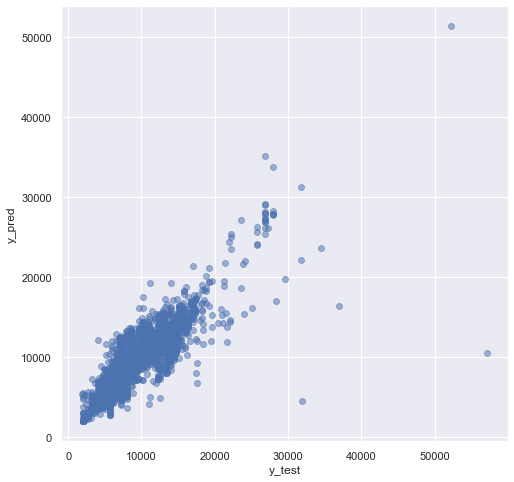

In [85]:
plt.figure(figsize = (8,8))
plt.scatter(Y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


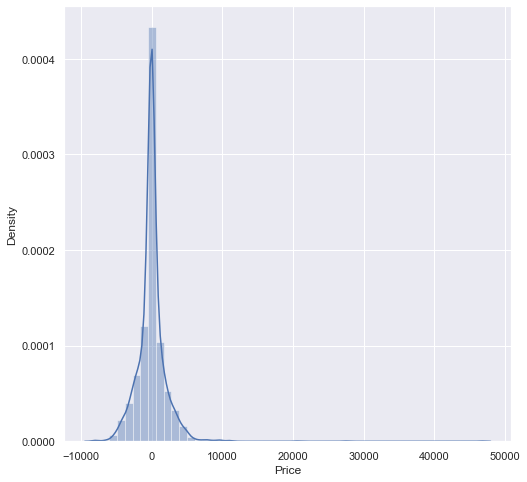

In [86]:
plt.figure(figsize = (8,8))
sns.distplot(Y_test-y_pred)
plt.show()

### Hyperparameter tuning


In [87]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start=200, stop=2000, num=10)]#List Comprehension-using for loop in list
max_features = ['auto', 'sqrt']#maximum number of features allowed to try in individual tree
max_depth = [int(x) for x in np.linspace(10, 110, num=11)]#List Comprehension-using for loop in list
max_depth.append(None)
min_samples_split = [2, 5, 10]#minimum number of samples required to split an internal node
min_samples_leaf = [1, 2, 4]#minimum number of samples required to be at a leaf node.
bootstrap = [True, False]#sampling 

#dictionary for hyperparameters
random_grid = {'n_estimators': n_estimators, 'max_features': max_features,
               'max_depth': max_depth, 'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf, 'bootstrap': bootstrap}

rf_clf1 = RandomForestRegressor(random_state=42)#model

rf_cv = RandomizedSearchCV(estimator=rf_clf1, scoring='f1',param_distributions=random_grid, n_iter=100, cv=3, 
                               verbose=2, random_state=42, n_jobs=-1)

rf_cv.fit(X_train, Y_train)##training data on randomsearch cv
rf_best_params = rf_cv.best_params_##it will give you best parameters 
print(f"Best paramters: {rf_best_params})")##printing  best parameters

Fitting 3 folds for each of 100 candidates, totalling 300 fits


C:\Users\HP\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:953: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


Best paramters: {'n_estimators': 400, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 30, 'bootstrap': True})


In [89]:
rf_clf2 = RandomForestRegressor(n_estimators= 400, min_samples_split= 5, min_samples_leaf= 1, max_features='sqrt', max_depth=30, bootstrap=True)#passing best parameter to randomforest
rf_clf2.fit(X_train, Y_train)#training 

y_pred=rf_clf2.predict(X_test)#testing
y_train_pred=rf_clf2.predict(X_train)

In [90]:
r2score=r2_score(Y_test,y_pred)
r2score

0.7997064474483165

In [91]:
r2score=r2_score(Y_train,y_train_pred)
r2score

0.913999881288861

In [92]:
print(mean_squared_error(Y_test,y_pred))
print(math.sqrt(mean_squared_error(Y_test,y_pred))) 
print(mean_absolute_error(Y_test,y_pred))

4328133.628881832
2080.4166959726676
1316.2774986775225


### Decision Tree

In [120]:
from sklearn.tree import DecisionTreeRegressor#importing decision tree from sklearn.tree
dt=DecisionTreeRegressor()#object creation for decision tree  
dt.fit(X_train,Y_train)#taining the model

y_predict=dt.predict(X_test)#prediction
y_train_predict=dt.predict(X_train)

In [121]:
r2score=r2_score(Y_test,y_predict)
r2score

0.6891180313486343

In [122]:
r2score=r2_score(Y_train,y_train_predict)
r2score

0.9745122270609577

In [123]:
print(mean_squared_error(Y_test,y_pred))
print(math.sqrt(mean_squared_error(Y_test,y_pred))) 
print(mean_absolute_error(Y_test,y_pred))

8567529.823676577
2927.0343051759023
2029.3211619584483


In [124]:
from sklearn.model_selection import GridSearchCV

In [131]:
params = {
    
    "splitter":("best", "random"), # searches the features for a split
    "max_depth":(list(range(1, 20))), #depth of tree range from 1 to 19
    "min_samples_split":[2, 3, 4],    #the minimum number of samples required to split internal node
    "min_samples_leaf":list(range(1, 20)),#minimum number of samples required to be at a leaf node,we are passing list which is range from 1 to 19 
}


tree_clf = DecisionTreeRegressor(random_state=3)#object creation for decision tree with random state 3
tree_cv = GridSearchCV(tree_clf, params, n_jobs=-1, verbose=1, cv=3)

In [132]:
tree_cv.fit(X_train,Y_train)#training data on gridsearch cv
best_params = tree_cv.best_params_#it will give you best parameters 
print(f"Best paramters: {best_params})")#printing  best parameters


Fitting 3 folds for each of 2166 candidates, totalling 6498 fits
Best paramters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 3, 'splitter': 'best'})


In [138]:
dt1=DecisionTreeRegressor(max_depth=1,min_samples_leaf= 1,min_samples_split=3,splitter='best')

In [139]:
dt1.fit(X_train,Y_train)

DecisionTreeRegressor(max_depth=1, min_samples_split=3)

In [140]:
y_predict=dt1.predict(X_test)#predicting
y_predict

array([ 5077.08989198, 11174.34982033, 11174.34982033, ...,
       11174.34982033, 11174.34982033, 11174.34982033])

In [142]:
r2score=r2_score(Y_test,y_predict)
r2score

0.38308386331536104

In [141]:
r2score=r2_score(Y_train,y_train_predict)
r2score

0.9745122270609577

In [ ]:
overfitted model

In [914]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error as mse
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [915]:
scaler = StandardScaler()
scaler1 = MinMaxScaler()

In [916]:
pd.set_option('display.max_columns',None)

In [917]:
X_scaled = scaler1.fit_transform(X)

In [918]:
X_scale = pd.DataFrame(X_scaled,columns=X.columns)
X_scale.head()


,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Journey_day,Journey_month,Arrival_hr,Arrival_min,Dep_hr,Dep_min,Duration_hours,Duration_mins,Total_Stops
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.884615,0.000000,0.043478,0.181818,0.956522,0.363636,0.042553,0.909091,0.00
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.666667,0.565217,0.272727,0.217391,0.909091,0.148936,0.454545,0.50
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.307692,1.000000,0.173913,0.454545,0.391304,0.454545,0.404255,0.000000,0.50
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.423077,0.666667,1.000000,0.545455,0.782609,0.090909,0.106383,0.454545,0.25
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.000000,0.913043,0.636364,0.695652,0.909091,0.085106,0.818182,0.25


In [919]:
xtrain,xtest,ytrain,ytest = train_test_split(X_scaled,Y,test_size=0.15,random_state=51)

In [920]:
rf = RandomForestRegressor()
rf.fit(xtrain,ytrain)
train = rf.predict(xtrain)
test = rf.predict(xtest)

print("r2 score for train", r2_score(ytrain,train))
print("mean squared error for train",mse(ytrain,train))
print("r2 score for test", r2_score(ytest,test))
print("mean squared error for train",mse(ytest,test))


r2 score for train 0.9536317744503771
mean squared error for train 1009421.3552277012
r2 score for test 0.8046377477503808
mean squared error for train 3747470.017411896


C:\Users\Satya\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


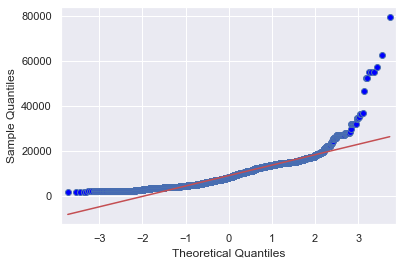

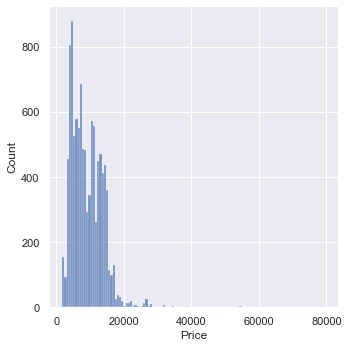

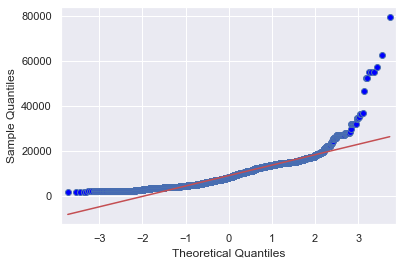

In [921]:
from statsmodels.graphics.gofplots import qqplot
sns.displot(Y)
qqplot(Y,line='s')

In [922]:
rf = RandomForestRegressor()
rf.fit(xtrain,np.log(ytrain))
train = rf.predict(xtrain)
test = rf.predict(xtest)


print("r2 score for train", r2_score(ytrain,np.exp(train)))
print("mean squared error for train",np.sqrt(mse(ytrain,np.exp(train))))
print("r2 score for test", r2_score(ytest,np.exp(test)))
print("mean squared error for train",np.sqrt(mse(ytest,np.exp(test))))

r2 score for train 0.9482519753059373
mean squared error for train 1061.3848746400115
r2 score for test 0.8093853246823774
mean squared error for train 1912.1718636659602


### Linear Regression

In [97]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,Y_train)

LinearRegression()

In [98]:
y_pred=lr.predict(X_test)
y_train_pred=lr.predict(X_train)

In [99]:
r2score=r2_score(Y_test,y_pred)
r2score

0.6035194076436101

In [100]:
r2score=r2_score(Y_train,y_train_pred)
r2score

0.6308131527995708

### KNN

In [101]:
from sklearn.neighbors import KNeighborsRegressor
error_rate = []

for i in range(1,30):
    KNN = KNeighborsRegressor(n_neighbors=i)
    KNN.fit(X_train,Y_train)
    pred_i = KNN.predict(X_test)
    error_rate.append(np.mean(pred_i != Y_test))

Text(0, 0.5, 'Error Rate')

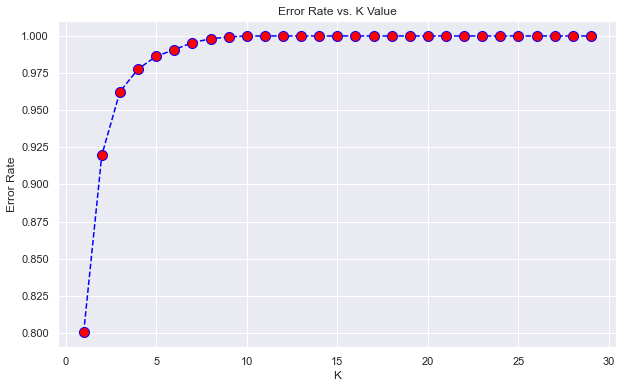

In [102]:
plt.figure(figsize=(10,6))
plt.plot(range(1,30),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [117]:
KNN=KNeighborsRegressor(n_neighbors=2)
KNN.fit(X_train,Y_train)
y_predict_KNN=KNN.predict(X_test)
y_train_predict=KNN.predict(X_train)

r2score=r2_score(Y_test,y_predict)
r2score


-0.005295965051264506

In [118]:
r2score=r2_score(Y_train,y_train_predict)
r2score

0.8670091543321415

### SVR

In [112]:
from sklearn.svm import SVR
svr= SVR() ## base model with default parameters
svr.fit(X_train, Y_train)

SVR()

In [113]:
y_predict=svr.predict(X_test)

In [114]:
r2score=r2_score(Y_test,y_predict)
r2score

-0.005295965051264506

### xgboost

In [277]:
 pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [108]:
import xgboost as xg

In [109]:
# Instantiation
xgb_r = xg.XGBRegressor(objective ='reg:linear',
                  n_estimators = 10, seed = 123)
  
# Fitting the model
xgb_r.fit(X_train,Y_train)
  
# Predict the model
pred = xgb_r.predict(X_test)
y_train_pred=xgb_r.predict(X_train)

[13:06:49] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cdc6-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


In [110]:
r2score=r2_score(Y_test,pred)
r2score

0.7816531503318163

In [111]:
r2score=r2_score(Y_train,y_train_pred)
r2score

0.8083275900635434